In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.formula.api as sf
import statsmodels.api as sm

from itertools import product
from scipy.stats import chi2_contingency
import matplotlib.patches as mpatches

In [2]:
df=pd.read_csv("https://stepic.org/media/attachments/course/524/train.csv",sep=",")

In [3]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df = df[df.Age.notnull()]

## Логарифмическая регрессия без предикторов

In [5]:
df['Survived'].value_counts()

0    424
1    290
Name: Survived, dtype: int64

In [6]:
logit_res=sf.glm(formula="Survived~1",data=df,family=sm.families.Binomial()).fit()

In [7]:
logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      713
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -482.26
Date:                Mon, 07 Dec 2020   Deviance:                       964.52
Time:                        12:45:59   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3799      0.076     -4.985      0.000      -0.529      -0.230
==============================================================================
"""

In [8]:
odds=290/424
odds

0.6839622641509434

Вероятность положительного исхода меньше, чем отрицательного

In [9]:
intersept=math.log(odds) 
intersept

-0.379852532251438

In [10]:
chans=math.exp(-0.3799)
chans

0.6839297987726981

chans=odds

In [11]:
math.exp(-0.8472979)

0.42857141159451617

## Логарифмическая регрессия с 1 предиктором

##### Таблица сопряженности данных о выживших в зависимости от пола

In [12]:
pd.crosstab(df["Survived"], df["Sex"])

Sex,female,male
Survived,,
0,64,360
1,197,93


In [13]:
logit_res_sex=sf.glm("Survived~Sex",df,family=sm.families.Binomial()).fit()

In [14]:
logit_res_sex.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      712
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -375.35
Date:                Mon, 07 Dec 2020   Deviance:                       750.70
Time:                        12:45:59   Pearson chi2:                     714.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1243      0.144      7.814      0.000       0.842       1.406
Sex[T.male]    -2.4778      0.185    -13.392      0.000      -2.840      -2.115
===============================================================================
"""

In [15]:
odds_m=93/360
odds_f=197/64

In [16]:
odds_f

3.078125

In [17]:
odds_m

0.25833333333333336

Логарифм шансов и отношения шансов

In [18]:
Intercept_f=math.log(odds_f)
Intercept_f

1.1243206453783166

In [19]:
Intercept_m=math.log(odds_m)
Intercept_m

-1.3535045382968995

In [20]:
Odds_ratio_m=math.log(odds_m/odds_f)
Odds_ratio_m

-2.4778251836752165

Во сколько раз различаются шансы

In [21]:
odds_f/odds_m

11.91532258064516

In [22]:
1/math.exp(Odds_ratio_m)

11.915322580645162

##### значение экспоненты коэффициентов модели

In [23]:
f=math.exp(Intercept_f)

In [24]:
m=math.exp(Intercept_f+Odds_ratio_m)
m

0.25833333333333325

In [25]:
f+m

3.336458333333333

## Сравнение качества модели без предиктора и с предиктором через остатки

Чем меньше остатки, тем лучше

In [26]:
# sm.stats.anova_lm(logit_res,logit_res_sex)

## Логарифмическая регрессия с 2 предикторами

In [27]:
pd.crosstab(df["Survived"], [df["Sex"],df["Pclass"]])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  55   61  84  215
1            82  68  47   40  15   38

In [28]:
logit_res_sex_class=sf.glm("Survived~Sex*C(Pclass)",df,family=sm.families.Binomial()).fit()
logit_res_sex_class.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      708
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -321.14
Date:                Mon, 07 Dec 2020   Deviance:                       642.28
Time:                        12:45:59   Pearson chi2:                     714.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      3.3081      0.588      5.628      0.000       2.156       4.460
Sex[T.male]                   -3.7301      0.622     -5.997      0.000      -4.949      -2.511
C(Pclass)[T.2]                -0.8804      0.726     -1.213      0.225      -2.303       0.542
C(Pclass)[T.3]                -3.4653      0.620     -5.585      0.000      -4.681      -2.249
Sex[T.male]:C(Pclass)[T.2]    -0.4204      0.804     -0.523      0.601      -1.997       1.156
Sex[T.male]:C(Pclass)[T.3]     2.1542      0.676      3.185      0.001       0.829       3.480
==============================================================================================
"""

Intercept=female in 1 Pclass

In [29]:
female_P1=math.log(82/3)
female_P1
# логарифм шансов положительного исхода

3.3081069585961433

In [30]:
male_P1=math.log(40/61)

# логарифм шансов отрицательного исхода

In [31]:
SexT_attit=male_P1-female_P1
SexT_attit
# Sex[T.male] = логарифм отношения шансов ln(M/F)=ln_M-ln_F

-3.7301013686555184

In [32]:
female_P1+SexT_attit
# male_P1

-0.4219944100593751

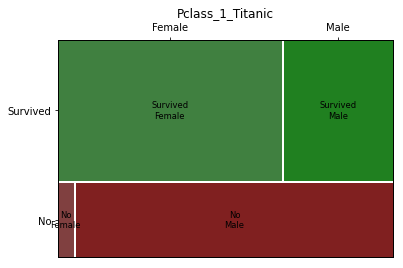

In [33]:
pill_data = {('No', 'Female'): 3,
             ('No', 'Male'): 61,
             ('Survived', 'Female'): 82,
             ('Survived', 'Male'): 40,
            }
mosaic(pill_data, gap=0.01, title="Pclass_1_Titanic",horizontal=False);

In [34]:
def make_me_plot(data):
    # Проводим анализ таблиц сопряженности
    data = data.copy()
    obs = data.unstack().T.values
    chi, pval, dof, est = chi2_contingency(obs)
    remains = (obs - est)  / np.sqrt(est)
    
    # Присваиваем соответствующие цвета
    hex_colors = sns.color_palette("coolwarm", 6).as_hex()
    color_labels = ['<-4', '-4:-2', '-2:0', '0:2', '2:4', '>4'][::-1]
    colors = pd.Series([x  for x in remains.ravel()], index=data.index, name='color')
    valrange = np.array([-np.inf, -4, -2, 0, 2, 4, np.inf])
    color_prop = {k: {'color' : hex_colors[np.argmax(v < valrange) - 1]}  for k, v in colors.iteritems()}
    patches = [mpatches.Patch(color=c, label=l) for c, l in zip(hex_colors, color_labels)]
    
    # Передаем все данные matplotlib
    fig, ax = plt.subplots()
    mosaic(data, gap=.02, properties=color_prop, ax=ax, labelizer= lambda x: '')
    fig.legend(handles=patches, bbox_to_anchor=(0.6, 0., 0.5, 0.5))

In [68]:
cure = ['Female', 'Male']
effect = ['Survived', 'No']
Pclass= ['1','2','3']
idx = pd.MultiIndex.from_tuples(product(cure, effect, Pclass))
data = pd.Series([82,68,47,3,6,55,40,15,38,61,84,215], index=idx)

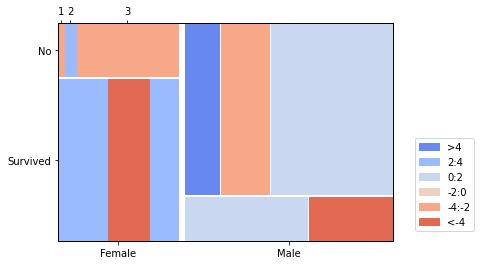

In [69]:
make_me_plot(data)

In [70]:
pd.crosstab(df["Survived"], [df["Sex"],df["Pclass"]])

Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  55   61  84  215
1            82  68  47   40  15   38

In [72]:
male_P2=math.log(15/84)
male_P2

-1.7227665977411035

In [73]:
Female_P2=math.log(68/6)
Female_P2

2.4277482359480516

In [81]:
(male_P2-Female_P2)-(male_P1-female_P1)
# разность логарифмов Р1 и Р2
# Sex[T.male]:C(Pclass)[T.2]

-0.42041346503363686

In [82]:
male_P3=math.log(38/215)
male_P3

-1.733051868401277

In [83]:
Female_P3=math.log(47/55)
Female_P3

-0.15718558352241238

In [84]:
(male_P3-Female_P3)-(male_P1-female_P1)
# разность логарифмов Р1 и Р3
# Sex[T.male]:C(Pclass)[T.3]

2.154235083776654